# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Lab/bank-additional-full.csv", sep = ";")

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [9]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,housing_unknown,housing_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [10]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

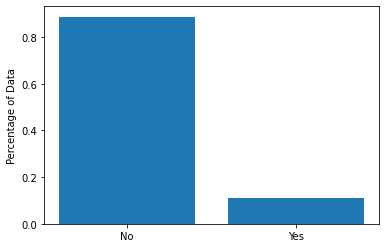

In [11]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [13]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE

#X_scaled = #???
#y_train = #???
oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)

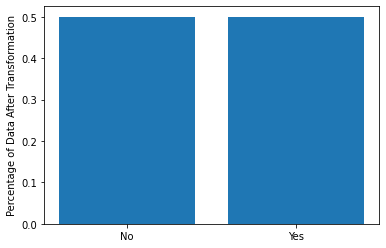

In [14]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data After Transformation")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [29]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.211\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.27\nsamples = 18619\nvalue = [15621, 2998]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.11\nsamples = 10480\nvalue = [9867, 613]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.096\nsamples = 10295\nvalue = [9776, 519]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 185\nvalue = [91, 94]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.414\nsamples = 8139\nvalue = [5754, 2385]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 5877\nvalue = [3561, 2316]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.059\nsamples = 2262\nvalue = [2193, 69]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.425\nsamples = 32541\nvalue = [9959, 22582]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.554\ngini = 0.346\nsamples = 26670\nvalue = [5929, 20741]\nclass = Yes

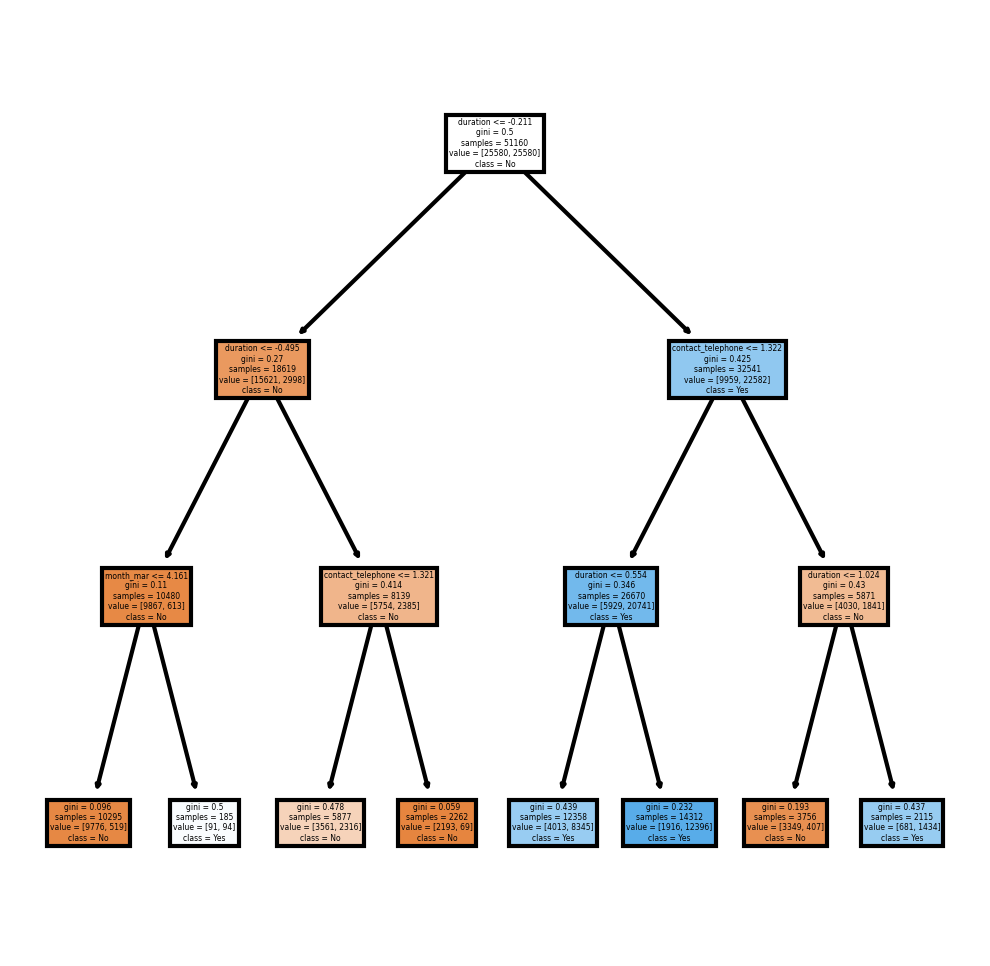

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

In [31]:
y_train_pred = dtree.predict(X_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)

In [32]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8043002345582486


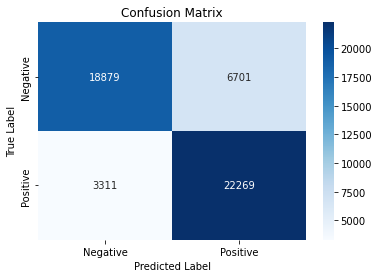

In [33]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [34]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7423322812980497


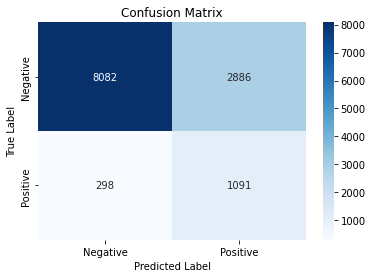

In [36]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [48]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.747430606134175


In [49]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.747430606134175


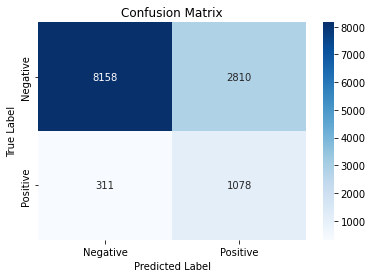

In [51]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [105]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8871894472768471


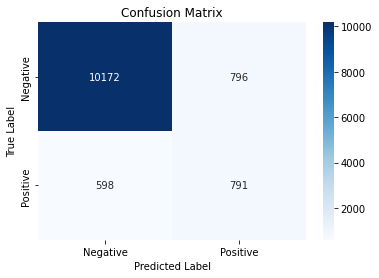

In [108]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [59]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.7 MB/s eta 0:00:00


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

In [80]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(), 
    RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = 'sqrt', random_state=42),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]

In [81]:
### Initialize super learner object and add base learners
super_learner = SuperLearner(folds=10, random_state=42)
super_learner.add(base_estimators)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [83]:
### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [96]:
### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

In [97]:
base_predictions

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [98]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
### Print coefficients
log_reg.coef_

array([[ 7.65559799, -7.45439871,  0.21221386,  0.05240757,  7.65559799]])

In [ ]:
### INTERPRET COEFFICIENTS

- The coefficients 7.65559799, -7.45439871, 0.21221386, 0.05240757 and 7.65559799 are for Logistic regression, Randomforest, DecisionTree, KNN and Naive Bayes respectively. 
- The meaning is that if Logistic regression and Naive Bayes predict the outcome to be 1, it will increase the probability of the final prediction as 1. 
- If Randomforest predict the outcome to be 1, it will decrease the probability of the final prediction as 1. 
- The predictions by DecisionTree, KNN have little impact on the final prediction of the model. 

In [100]:
y_true = y_test
cm_sl = confusion_matrix(y_true, y_pred)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8481022901998867


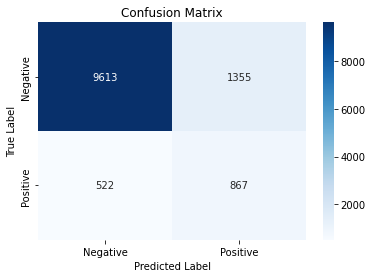

In [102]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_sl, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [109]:
# Calculate Sensitivities for decision tree
TP = cm_raw[1][1] 
FN = cm_raw[1][0]
raw = TP / (TP + FN)

# Calculate Sensitivities for bagged
TP = cm_bag[1][1] 
FN = cm_bag[1][0]
bag = TP / (TP + FN)

# Calculate Sensitivities for boosted
TP = cm_boost[1][1] 
FN = cm_boost[1][0]
boost = TP / (TP + FN)

# Calculate Sensitivities for super learner 
TP = cm_sl[1][1] 
FN = cm_sl[1][0]
sl = TP / (TP + FN)

Text(0.5, 1.0, 'Out of Sample Sensitivities')

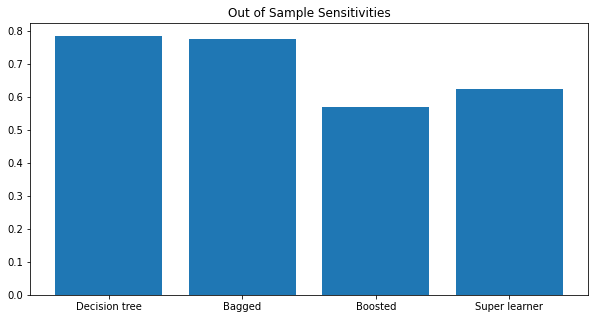

In [115]:
plt.figure(figsize = (10,5))
plt.bar(['Decision tree','Bagged','Boosted','Super learner'], [raw, bag, boost, sl])
plt.title('Out of Sample Sensitivities')

In [116]:
# Calculate Specificities for decision tree
TN = cm_raw[0][0] 
FP = cm_raw[0][1]
raw = TN / (TN + FP)

# Calculate Specificities for bagged
TN = cm_bag[0][0] 
FP = cm_bag[0][1]
bag = TN / (TN + FP)

# Calculate Specificities for boosted
TN = cm_boost[0][0] 
FP = cm_boost[0][1]
boost = TN / (TN + FP)

# Calculate Specificities for super learner 
TN = cm_sl[0][0] 
FP = cm_sl[0][1]
sl = TN / (TN + FP)

Text(0.5, 1.0, 'Out of Sample Specificities')

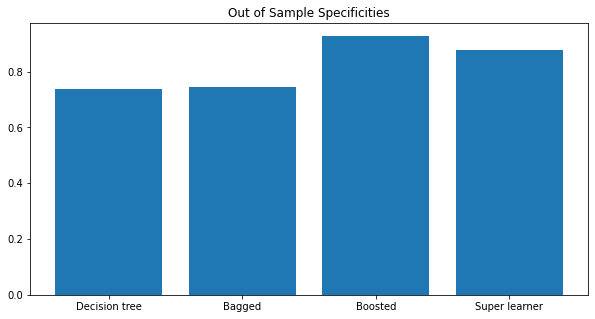

In [117]:
plt.figure(figsize = (10,5))
plt.bar(['Decision tree','Bagged','Boosted','Super learner'], [raw, bag, boost, sl])
plt.title('Out of Sample Specificities')

- From the graph above, we can see that decision tree has the highest sensitivity and boosted has the lowest sensitivity.

- From the graph below, we can see that boosted has the highest sensitivity and decision tree has the lowest sensitivity.